In [1]:
import pandas, scipy, numpy
import sklearn.ensemble
import sklearn.metrics
from IPython.display import Image

import sys
sys.path.append('./github/local-adverse-detection/')
from lad import lad_Thibault

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# German credit score

#1 (bad loans) and 2 (good loans)
path_dataset='/Users/axa/Data/data-german-credit.csv'
Xraw = pandas.read_csv(path_dataset, delimiter=",", index_col=0)
y = Xraw.label
X = Xraw.iloc[:,Xraw.columns != 'label']
Xnorm = (X-X.mean())/X.std()

In [3]:
def get_normed_direction(p1, p2):
    v = p2-p1
    d = v/numpy.linalg.norm(v)
    return d.loc[d.map(lambda x : x).abs().sort_values(ascending = False).index]

In [4]:
import pickle

blackbox = pickle.load( open( "../../bb_model.p", "rb" ) )
adversarials = pickle.load( open( "../../adversarials.p", "rb" ) )

In [7]:
def get_pred(blackbox, X, x):
    x = (x-X.mean())/X.std()
    # Uniquement pour credit score !
    return blackbox.predict([x]).argmax()+1

In [5]:
#Xs = X[(X['Status_of_existing_checking_account']>1.5)*(X['Other_installment_plans']<=1.5)*(X['Age_in_years']<44.5)*(X['Age_in_years']<50)]
Xs = X[(X['Age_in_years']>40)]

for xi in Xs.index:
    x = Xs.loc[xi].copy()
    ypred_1 = get_pred(blackbox, X, x)

    f = 'Age_in_years'
    x.loc[f] = 30
    ypred_2 = get_pred(blackbox, X, x)

    if ypred_1==1 and ypred_2==2:
        print(ypred)
        print(xi)

NameError: name 'get_pred' is not defined

In [149]:
Xs.loc[263]

Status_of_existing_checking_account                            3
Duration_in_month                                             12
Credit_history                                                 4
Purpose                                                        7
Credit_amount                                               2748
Savings_account_bonds                                          0
Present_employment_since                                       4
Installment_rate_in_percentage_of_disposable_income            2
Personal_status_and_sex                                        1
Other_debtors_guarantors                                       0
Present_residence_since                                        4
Property                                                       3
Age_in_years                                                  57
Other_installment_plans                                        0
Housing                                                        2
Number_of_existing_credit

In [175]:
x = Xs.loc[263].copy()
get_pred(blackbox, X, x)

1

In [176]:
x = Xs.loc[263].copy()
f = 'Age_in_years'
x.loc[f] = 30

get_pred(blackbox, X, x)

2

In [179]:
x1 = Xs.loc[263].copy()
x2 = Xs.loc[263].copy()
f = 'Age_in_years'
x2.loc[f] = 30
get_normed_direction(x1, x2)

Age_in_years                                               -1.0
foreign_worker                                              0.0
Personal_status_and_sex                                     0.0
Duration_in_month                                           0.0
Credit_history                                              0.0
Purpose                                                     0.0
Credit_amount                                               0.0
Savings_account_bonds                                       0.0
Present_employment_since                                    0.0
Installment_rate_in_percentage_of_disposable_income         0.0
Other_debtors_guarantors                                    0.0
Telephone                                                   0.0
Present_residence_since                                     0.0
Property                                                    0.0
Other_installment_plans                                     0.0
Housing                                 

In [250]:
ls = lad_Thibault.LocalSurrogate(Xnorm, blackbox=blackbox, n_support_points=100, max_depth=1)

x_toexplain = x2
support_points, surrogate = ls.get_local_surrogate(x_toexplain)

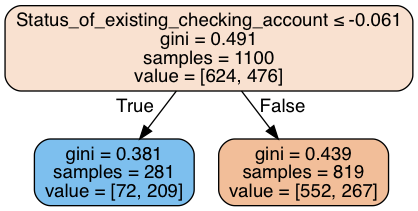

In [251]:
Image(ls.plot_decision_tree(X, surrogate))

In [321]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

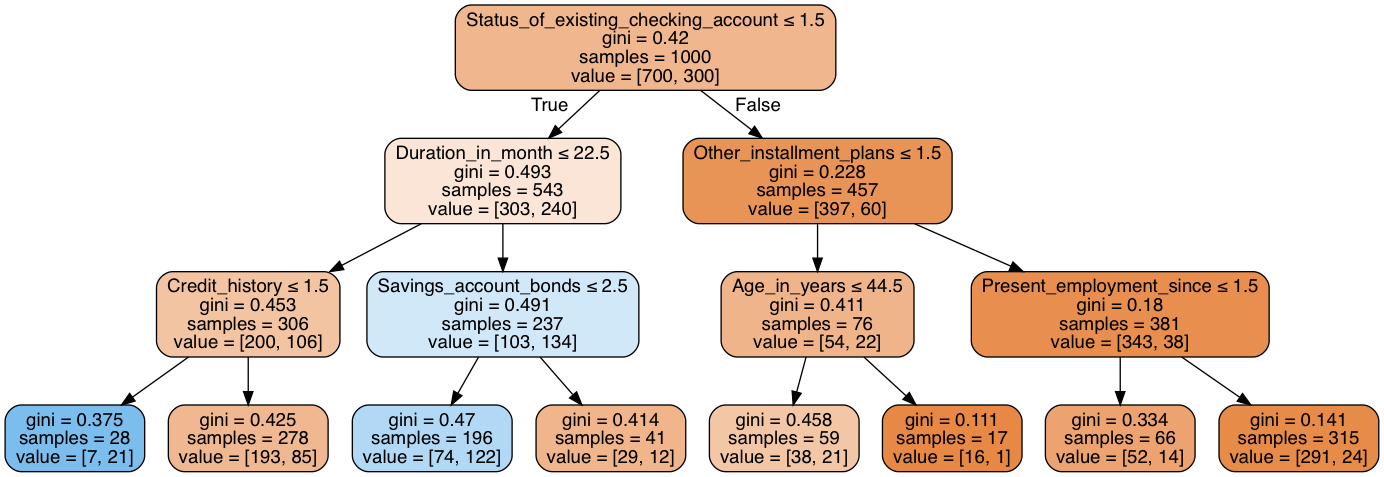

In [322]:
# to plot dtree
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

img =  graph.create_png()

Image(img)

In [10]:
Xs = X[(X['Status_of_existing_checking_account']<1.5)*(X['Duration_in_month']<22.5)*(X['Credit_history']>1.5)]

/Users/axa/anaconda/envs/basic/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/Users/axa/anaconda/envs/basic/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


(array([ 204.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   74.]),
 array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ]),
 <a list of 10 Patch objects>)

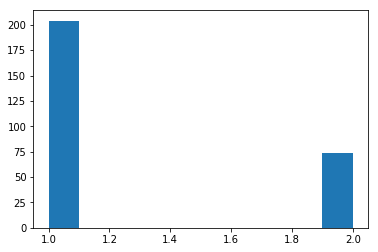

In [6]:
hist(blackbox.predict(Xnorm.loc[Xs.index]).argmax(axis=1)+1)

(array([  8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  20.]),
 array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ]),
 <a list of 10 Patch objects>)

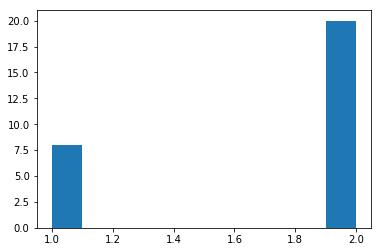

In [9]:
hist(blackbox.predict(Xnorm.loc[Xs.index]).argmax(axis=1)+1)

In [ ]:
blackbox.predict(Xnorm.loc[Xs.index])

In [328]:
for xi in Xs.index:
    x = Xs.loc[xi].copy()
    ypred_1 = get_pred(blackbox, X, x)

    f = 'Credit_history'
    x.loc[f] = 1
    ypred_2 = get_pred(blackbox, X, x)

    if ypred_1==1 and ypred_2==2:
        print(ypred)
        print(xi)

1
14
1
72
1
75
1
91
1
110
1
112
1
125
1
176
1
179
1
337
1
407
1
479
1
590
1
690
1
746
1
759
1
892
1
922
1
929
1
985


In [51]:
xi = 14

x = X.loc[xi].copy()
ypred_1 = get_pred(blackbox, X, x)

"""f = 'Credit_history'
x.loc[f] = 0
ypred_2 = get_pred(blackbox, X, x)"""

f = 'Age_in_years'
x.loc[f] = 10
ypred_2 = get_pred(blackbox, X, x)

print(ypred_1)
print(ypred_2)

1
2


In [36]:
y_bin = pandas.concat(((y==1)*1, (y==2)*1), axis=1)
y_bin.columns = ['1', '2']

In [48]:
ls = lad_Thibault.LocalSurrogate(Xnorm, blackbox=blackbox, n_support_points=100, max_depth=5)

#x_toexplain = Xs.loc[xi].copy()
x_toexplain = (x-X.mean())/X.std()
support_points, surrogate = ls.get_local_surrogate(x_toexplain)

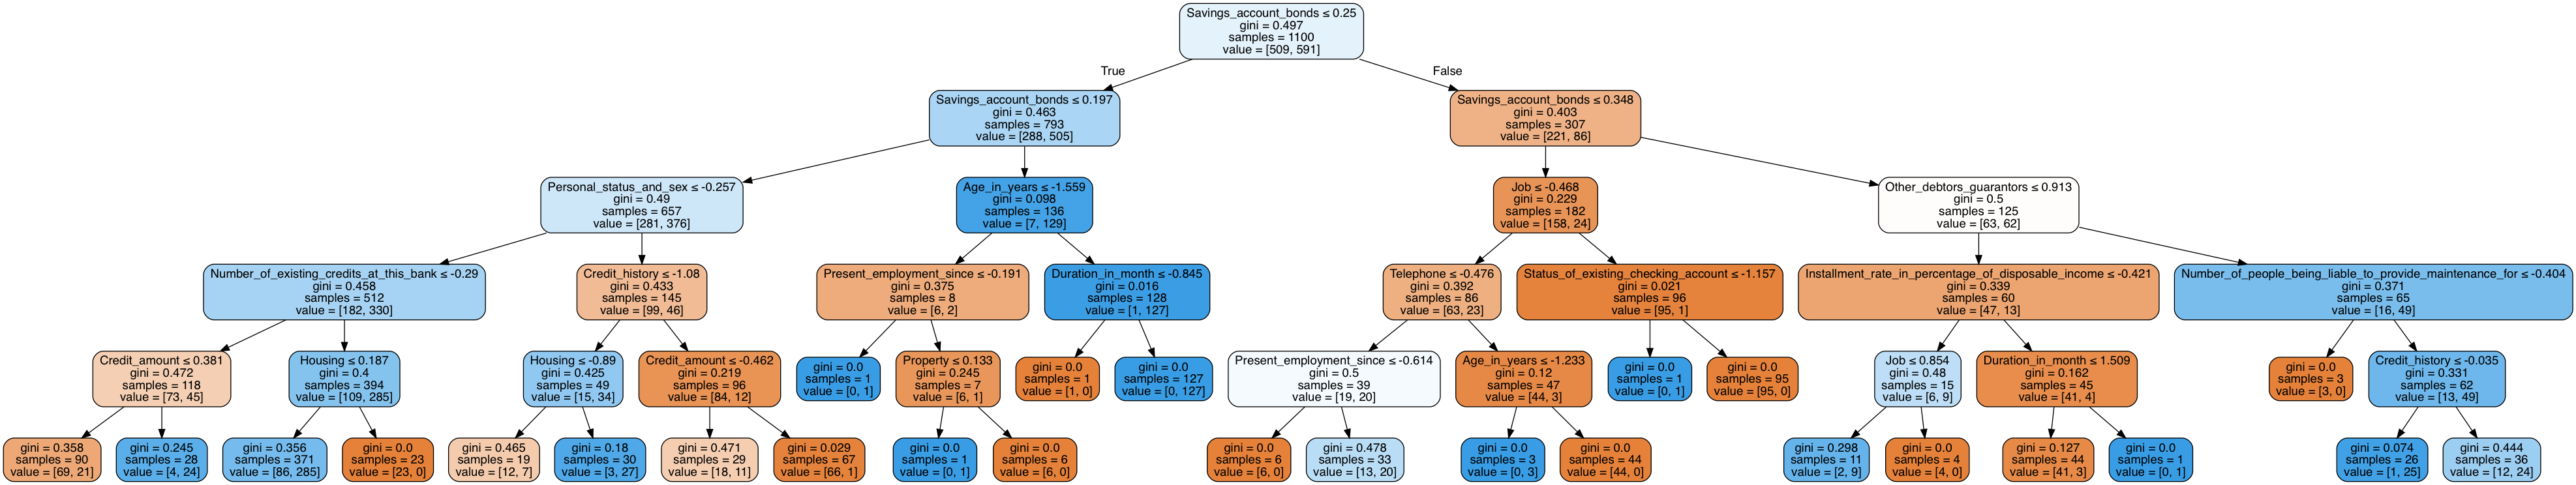

In [49]:
Image(ls.plot_decision_tree(X, surrogate))

In [50]:
pandas.Series(surrogate.feature_importances_, index=X.columns).sort_values(ascending=False)

Savings_account_bonds                                       0.355589
Housing                                                     0.105936
Personal_status_and_sex                                     0.079805
Credit_history                                              0.077874
Credit_amount                                               0.072510
Number_of_existing_credits_at_this_bank                     0.070023
Other_debtors_guarantors                                    0.059359
Age_in_years                                                0.045862
Job                                                         0.032705
Telephone                                                   0.028329
Installment_rate_in_percentage_of_disposable_income         0.019377
Present_employment_since                                    0.016533
Duration_in_month                                           0.012139
Number_of_people_being_liable_to_provide_maintenance_for    0.011784
Status_of_existing_checking_accoun